# Random Forest
In this section, we will build and evaluate a Random Forest model using Scikit-Learn. The model will be trained on a dataset to predict employee attrition.

In [14]:
import os 
import sys

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [15]:
base_dir = os.path.dirname(os.getcwd())
path_dataset = os.path.join(base_dir, 'datasets', 'OneHotEncoded_Human_Resources.csv')
data_frame = pd.read_csv(path_dataset)
Y = data_frame['Attrition']
X = data_frame.drop('Attrition', axis=1)

In [16]:
# Dataset split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [17]:
# Model 
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

##### Acuracy 
The cell below calculates and prints the accuracy of the Logistic Regression model on the test dataset. The accuracy is a measure of how well the model is able to predict the correct class labels for the test data. 

The accuracy of the model is 0.8878, which means that the model correctly predicts the class labels for approximately 88.78% of the test data. This indicates that the model has a good performance in predicting employee attrition.

In [18]:
Y_pred = model.predict(X_test)
Y_pred = (Y_pred > 0.5)
Y_pred = Y_pred.astype(int)

accuracy = accuracy_score(Y_test, Y_pred)
print('Accuracy: ', accuracy)

Accuracy:  0.8741496598639455


#### Classification 
The cell below prints the classification report, which includes precision, recall, f1-score, and support for each class. This report provides a detailed analysis of the model's performance on the test dataset.

The classification report shows that the model has a high precision and recall for the majority class (Attrition = 0), but lower precision and recall for the minority class (Attrition = 1). This indicates that the model performs well in predicting the majority class but struggles with the minority class. Overall, the model has an accuracy of 88.78%, which suggests it is effective in predicting employee attrition. There's room for improvement.

In [19]:
class_report = classification_report(Y_test, Y_pred)
print('Classification Report: ', class_report)

Classification Report:                precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       255
         1.0       0.67      0.10      0.18        39

    accuracy                           0.87       294
   macro avg       0.77      0.55      0.55       294
weighted avg       0.85      0.87      0.83       294



#### Confusion Matrix
The cell below calculates and displays the confusion matrix for the Logistic Regression model's predictions on the test dataset. The confusion matrix provides a summary of the prediction results, showing the number of true positives, true negatives, false positives, and false negatives. This helps in understanding the performance of the model in terms of correctly and incorrectly classified instances.

Overall, the confusion matrix indicates that the model performs well in predicting the majority class (Attrition = 0) but has some difficulty in accurately predicting the minority class (Attrition = 1). This is evident from the higher number of false negatives compared to false positives. The model's accuracy of 88.78% suggests it is effective in predicting employee attrition, but there is room for improvement, particularly in handling the minority class.

Confusion Matrix: 
 [[253   2]
 [ 35   4]]


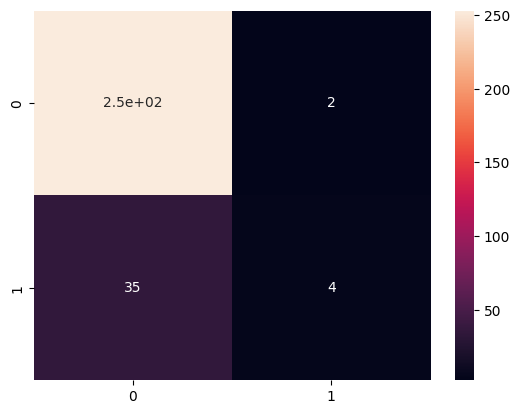

In [20]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix: \n', conf_matrix)
sns.heatmap(conf_matrix, annot=True)
plt.show()